# DOPPIO model data

DOPPIO is a regional model (ROMS) run at rutgers by John Wilkin's group to forecast the state of the Gulf of Maine / mid atlantic bight. 


The data is available on a thredds server:

http://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/Averages_Best

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

/Users/beaird/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# read in the data

available at:
```python
url = 'http://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/Averages_Best'
```


In [2]:
url = 'http://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/Averages_Best'

ds = xr.open_dataset(url)

ds

<xarray.Dataset>
Dimensions:         (boundary: 4, eta_psi: 105, eta_rho: 106, eta_u: 106, eta_v: 105, ocean_time: 1, s_rho: 40, s_w: 41, time: 745, tracer: 2, xi_psi: 241, xi_rho: 242, xi_u: 241, xi_v: 242)
Coordinates:
  * s_rho           (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w             (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2019-10-02T12:00:00
  * time            (time) datetime64[ns] 2017-11-02T12:00:00 ... 2019-11-16T12:00:00
    time_run        (time) datetime64[ns] ...
Dimensions without coordinates: bou

# Lazy loading to subset

xarray only grabs the metadata until we try to do something. So we can easily just get a part we are interested in

Let's grab data from July 21, 2019 useing the `.sel()` method. 

The other `.sel()` I want to do is to take `s_rho=0, method='nearest'` which takes a single level ("0") of the model so we can plot it.  

Finally, the `squeeze()` thing removes redundant dimensions (i.e we only have one time and level (~depth) now). This helps with plotting. 


In [3]:
subset = ds.sel(time = '2019-07-21', s_rho =0, method = 'nearest').squeeze()

subset

<xarray.Dataset>
Dimensions:         (boundary: 4, eta_psi: 105, eta_rho: 106, eta_u: 106, eta_v: 105, s_w: 41, tracer: 2, xi_psi: 241, xi_rho: 242, xi_u: 241, xi_v: 242)
Coordinates:
    s_rho           float64 -0.0125
  * s_w             (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
    ocean_time      datetime64[ns] 2019-10-02T12:00:00
    time            datetime64[ns] 2019-07-21T12:00:00
    time_run        datetime64[ns] ...
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes          int32 ...
    ndtfast 

# plot the model salinity

let's plot the models salinity using the built-in xarray plotting without any projection. In this case I want to explicitly tell xarrays's `.plot()` that I want the x and y axes of the plot to be `lon_rho` and `lat_rho`, which we do by adding a `x=` and `y=` argument in `.plot()`. I also want to set the color limits of the plot, which we can do with `vmin=__, vmax=__` as more arguments in `.plot()`.
 
 
putting it all together our new type of plot code will look like:

```python
subset.___.plot( x='lon_rho', y='lat_rho', vmin=28, vmax=35)

```
 
 fill in the blanks to make it plot the salinity


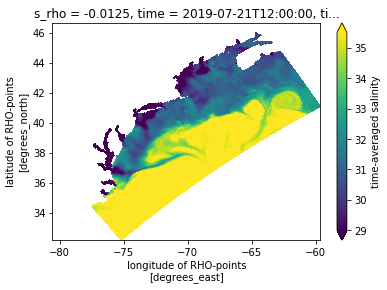

In [4]:
subset.salt.plot( x='lon_rho', y='lat_rho', vmin=29, vmax=35.5)

# map projections with cartopy

If we set up a map projection axes, i.e `plt.axes(projection = )`, we can then input the cartopy `transform=` argument directly into the xarray plotting function if we want to get a nicely formatted projection:

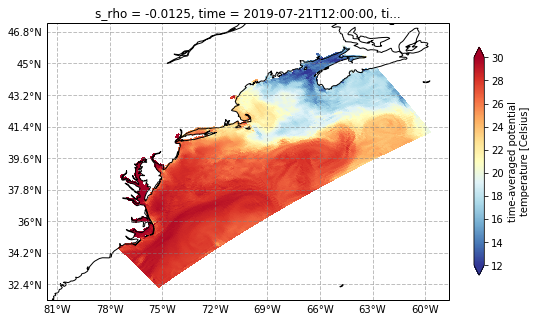

In [5]:
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

subset.temp.plot(x='lon_rho', y='lat_rho', ax=ax, vmin=12, vmax=30, cmap = 'RdYlBu_r', transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.7})